In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
dataset = pd.read_pickle("../Création du Dataset/dataset.pkl")

In [4]:
print(dataset['TOP1_GWR'])

EUW1_6140228604    0.520000
EUW1_6141546191    0.506751
EUW1_6140416681    0.486784
EUW1_6139592219    0.554688
EUW1_6045620377    0.499322
                     ...   
EUW1_6135052656    0.522337
EUW1_6141595905    0.557522
EUW1_6137361607    0.513158
EUW1_6088300233    0.468354
EUW1_6140544884    0.342857
Name: TOP1_GWR, Length: 2293, dtype: float64


In [5]:
topGWR = list(dataset[['TOP0_GWR','TOP1_GWR']].stack())
jglGWR = list(dataset[['JGL0_GWR','JGL1_GWR']].stack())
midGWR = list(dataset[['MID0_GWR','MID1_GWR']].stack())
adcGWR = list(dataset[['ADC0_GWR','ADC1_GWR']].stack())
supGWR = list(dataset[['SUP0_GWR','SUP1_GWR']].stack())

topLVL = list(dataset[['TOP0_LVL','TOP1_LVL']].stack())
jglLVL = list(dataset[['JGL0_LVL','JGL1_LVL']].stack())
midLVL = list(dataset[['MID0_LVL','MID1_LVL']].stack())
adcLVL = list(dataset[['ADC0_LVL','ADC1_LVL']].stack())
supLVL = list(dataset[['SUP0_LVL','SUP1_LVL']].stack())

In [6]:
top = pd.DataFrame(zip(topLVL,topGWR),columns=['LVL','GWR'])
jgl = pd.DataFrame(zip(jglLVL,jglGWR),columns=['LVL','GWR'])
mid = pd.DataFrame(zip(midLVL,midGWR),columns=['LVL','GWR'])
adc = pd.DataFrame(zip(adcLVL,adcGWR),columns=['LVL','GWR'])
sup = pd.DataFrame(zip(supLVL,supGWR),columns=['LVL','GWR'])
tot = pd.concat([top,jgl,mid,adc,sup], axis=0)

[Text(0.5, 1.0, 'TOTAL')]

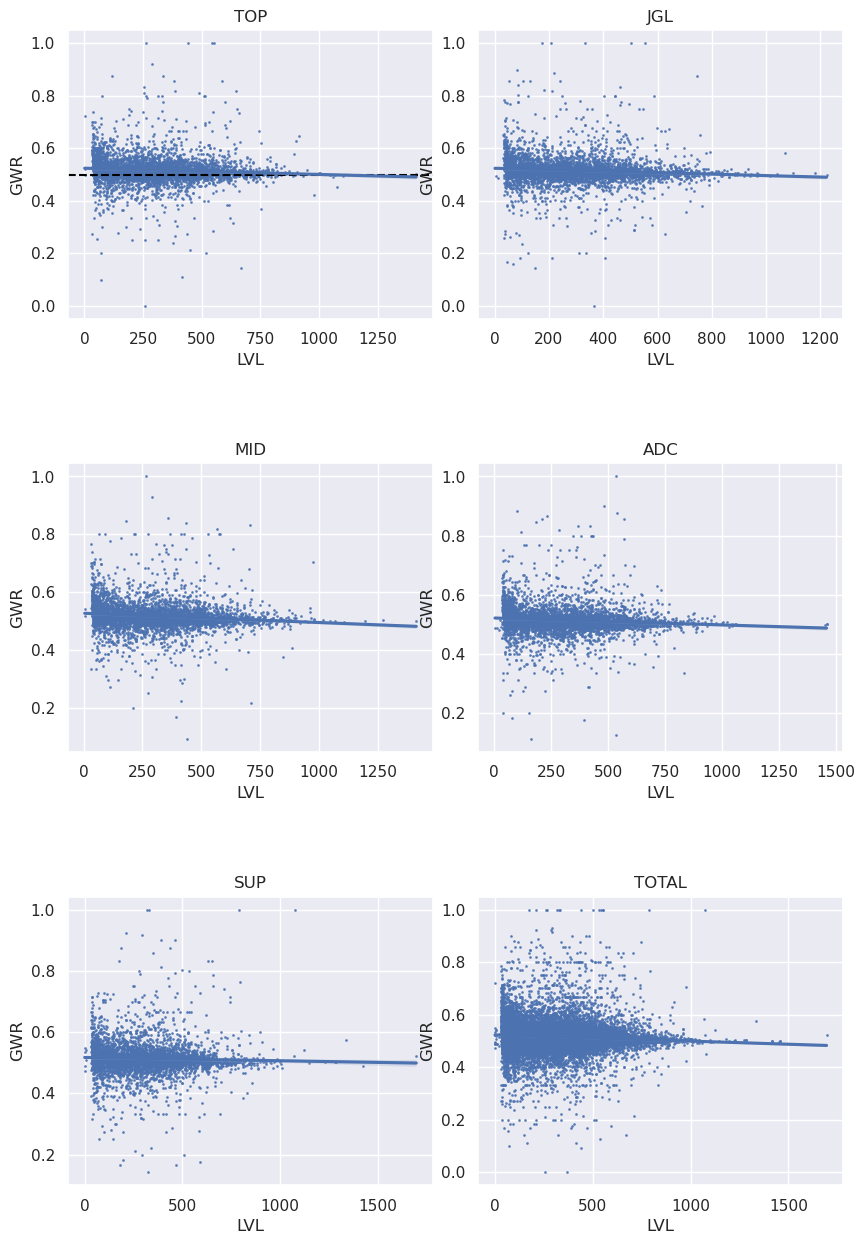

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
axs[0,0].axhline(y=0.5, color="black", linestyle="--")
sns.regplot(data=top, x="LVL", y="GWR", ax=axs[0, 0], scatter_kws={"s": 1}).set(title="TOP")
sns.regplot(data=jgl, x="LVL", y="GWR", ax=axs[0, 1], scatter_kws={"s": 1}).set(title="JGL")
sns.regplot(data=mid, x="LVL", y="GWR", ax=axs[1, 0], scatter_kws={"s": 1}).set(title="MID")
sns.regplot(data=adc, x="LVL", y="GWR", ax=axs[1, 1], scatter_kws={"s": 1}).set(title="ADC")
sns.regplot(data=sup, x="LVL", y="GWR", ax=axs[2, 0], scatter_kws={"s": 1}).set(title="SUP")
sns.regplot(data=tot, x="LVL", y="GWR", ax=axs[2, 1], scatter_kws={"s": 1}).set(title="TOTAL")

In [8]:
def myPlot(dataset,x,y,xname="X",yname="Y",title="Plot"):
    xdata = list(dataset[x].stack())
    ydata = list(dataset[y].stack())
    data = pd.DataFrame(zip(xdata,ydata),columns=[xname,yname])
    fig, axs = plt.subplots(figsize=(5,5))
    plt.axhline(y=0.5, color="black", linestyle="--")
    plt.ylim(0.2,0.8)
    plt.xlim(0,max(xdata)/2)
    sns.regplot(data=data, x=xname, y=yname, scatter_kws={"s": 0.2}).set(title=title)

In [9]:
top0KDA = pd.DataFrame(dataset['TOP0_KDAG'].tolist(),dataset.index,columns=['TOP0_K','TOP0_D','TOP0_A'])
dataset['TOP0_KDA_Ratio'] = (top0KDA['TOP0_K'] + top0KDA['TOP0_A']) / (top0KDA['TOP0_D']+1)

In [10]:
dataset['TOP0_KDA_Ratio']

EUW1_6140228604    1.588235
EUW1_6141546191    1.838710
EUW1_6140416681    3.360000
EUW1_6139592219    1.256410
EUW1_6045620377    2.652174
                     ...   
EUW1_6135052656    2.513514
EUW1_6141595905    2.216216
EUW1_6137361607    1.361111
EUW1_6088300233    1.793103
EUW1_6140544884    0.600000
Name: TOP0_KDA_Ratio, Length: 2293, dtype: float64

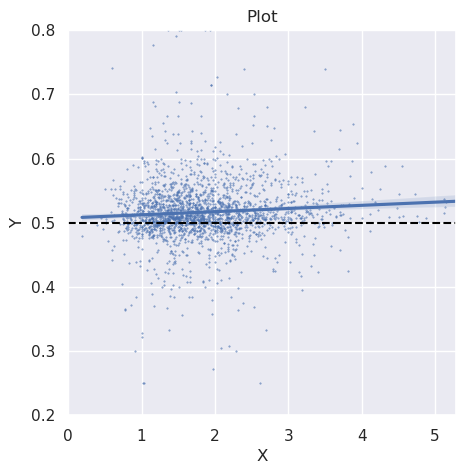

In [11]:
myPlot(dataset,['TOP0_KDA_Ratio'],['TOP0_GWR'])

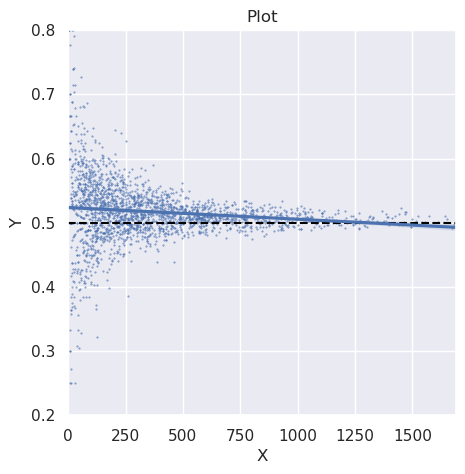

In [12]:
myPlot(dataset,['TOP0_TOTAL'],['TOP0_GWR'])